In [ ]:
#importing the library
import pandas as pd

In [ ]:
dataset= pd.read_csv("/content/drive/MyDrive/xAPI-Edu-Data.csv - xAPI-Edu-Data.csv.csv")

In [ ]:
dataset

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15.0,16.0,2.0,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20.0,20.0,3.0,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10.0,7.0,0.0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30.0,NaN,5.0,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,NaN,50.0,12.0,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5.0,4.0,5.0,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50.0,77.0,14.0,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55.0,74.0,25.0,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30.0,17.0,14.0,57,No,Bad,Above-7,L


In [ ]:
dataset.dtypes

gender                       object
NationalITy                  object
PlaceofBirth                 object
StageID                      object
GradeID                      object
SectionID                    object
Topic                        object
Semester                     object
Relation                     object
raisedhands                 float64
VisITedResources            float64
AnnouncementsView           float64
Discussion                    int64
ParentAnsweringSurvey        object
ParentschoolSatisfaction     object
StudentAbsenceDays           object
Class                        object
dtype: object

**Checking for missing values**

In [ ]:
missing_values= dataset.isnull().sum()
print(missing_values)

gender                       0
NationalITy                  0
PlaceofBirth                 0
StageID                      0
GradeID                      0
SectionID                    0
Topic                       10
Semester                     0
Relation                    15
raisedhands                 20
VisITedResources             4
AnnouncementsView           11
Discussion                   0
ParentAnsweringSurvey        0
ParentschoolSatisfaction     5
StudentAbsenceDays           5
Class                       13
dtype: int64


In [ ]:
missing_values_percentage= 100 * missing_values/ len(dataset)
print(missing_values_percentage)

gender                      0.000000
NationalITy                 0.000000
PlaceofBirth                0.000000
StageID                     0.000000
GradeID                     0.000000
SectionID                   0.000000
Topic                       2.083333
Semester                    0.000000
Relation                    3.125000
raisedhands                 4.166667
VisITedResources            0.833333
AnnouncementsView           2.291667
Discussion                  0.000000
ParentAnsweringSurvey       0.000000
ParentschoolSatisfaction    1.041667
StudentAbsenceDays          1.041667
Class                       2.708333
dtype: float64


Replacing NaN values with 0

In [ ]:
dataset['raisedhands']= dataset['raisedhands'].fillna(0)
dataset['VisITedResources']=dataset['VisITedResources'].fillna(0)
dataset['Relation']= dataset['Relation'].fillna('Others')

In [ ]:
dataset

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15.0,16.0,2.0,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20.0,20.0,3.0,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10.0,7.0,0.0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30.0,0.0,5.0,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,0.0,50.0,12.0,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5.0,4.0,5.0,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50.0,77.0,14.0,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55.0,74.0,25.0,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30.0,17.0,14.0,57,No,Bad,Above-7,L


Imputing missing values for categorical values

In [ ]:
x= dataset['Topic'].mode
y= dataset['Class'].mode

In [ ]:
dataset['Topic'].fillna(x, inplace=True)
dataset['Class'].fillna(y, inplace=True)

**Dealing with outliers using boxplot**

Text(0.5, 0, 'VisITedResources')

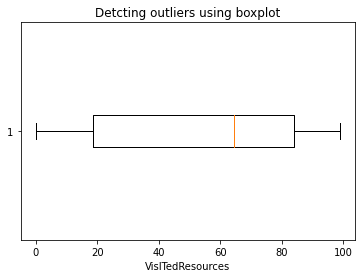

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(dataset['VisITedResources'], vert=False)
plt.title("Detcting outliers using boxplot")
plt.xlabel('VisITedResources')

Creating another dataframe for outlier detection demonstration

In [ ]:
outlier_df= dataset.copy(deep=True)

In [ ]:
outlier_df

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15.0,16.0,2.0,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20.0,20.0,3.0,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10.0,7.0,0.0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30.0,0.0,5.0,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,0.0,50.0,12.0,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5.0,4.0,5.0,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50.0,77.0,14.0,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55.0,74.0,25.0,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30.0,17.0,14.0,57,No,Bad,Above-7,L


In [ ]:
outlier_df.loc[7,'raisedhands']=200
outlier_df["raisedhands"][475]

5.0

Checking for outliers

Text(0.5, 0, 'raisedhands')

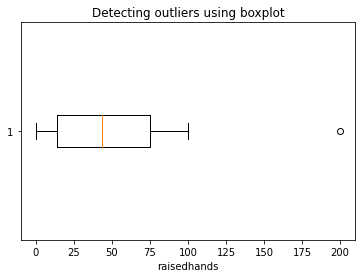

In [ ]:
plt.boxplot(outlier_df["raisedhands"], vert=False)
plt.title("Detecting outliers using boxplot")
plt.xlabel('raisedhands')

Imputing the outlier

In [ ]:
import numpy as np
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers
marks_outliers = detect_outliers_zscore(outlier_df["raisedhands"])
print("Outliers from Z-scores method: ", marks_outliers)

Outliers from Z-scores method:  [200.0]


Data Transformation

In [ ]:
#importing label encoder
from sklearn import preprocessing

label_encoder= preprocessing.LabelEncoder()

#encoding labels in column position
dataset['ParentAnsweringSurvey']=label_encoder.fit_transform(dataset['ParentAnsweringSurvey'])
dataset['ParentAnsweringSurvey'].unique()

array([1, 0])

In [ ]:
dataset

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15.0,16.0,2.0,20,1,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20.0,20.0,3.0,25,1,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10.0,7.0,0.0,30,0,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30.0,0.0,5.0,35,0,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,0.0,50.0,12.0,50,0,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5.0,4.0,5.0,8,0,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50.0,77.0,14.0,28,0,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55.0,74.0,25.0,29,0,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30.0,17.0,14.0,57,0,Bad,Above-7,L
